In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs

In [9]:
x, y = make_blobs(n_samples = 300, centers = 4 , cluster_std = 0.60, random_state = 0)

In [10]:
x.shape

(300, 2)

In [11]:
x[:5,:]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207]])

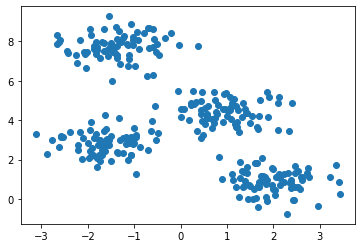

In [12]:
plt.scatter(x[:,0],x[:,1])

### K-Means clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(4)

In [15]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [16]:
pred_y = kmeans.fit_predict(x)

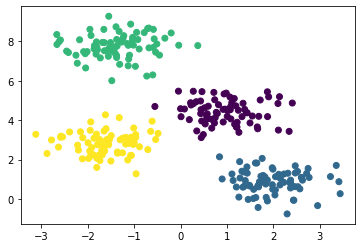

In [17]:
plt.scatter(x[:,0],x[:,1],c = pred_y)

C:\Users\Nimisha.Anandan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


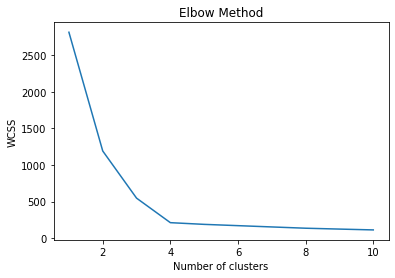

In [18]:
wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* wcss value decreases suddenly at 4. the elbow point. so k=4 is taken

In [19]:
from sklearn.metrics import silhouette_score

In [21]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

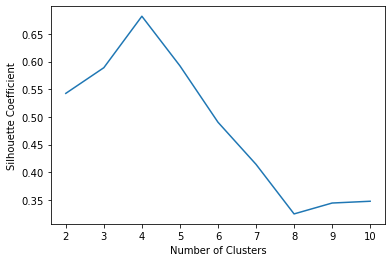

In [22]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

* Higher value of silhouette coefficient is considered good. here its 4

### Hierarchial clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
ac2 = AgglomerativeClustering(n_clusters = 4)

In [25]:
ac2.fit(x)

AgglomerativeClustering(n_clusters=4)

In [26]:
pred_y = ac2.fit_predict(x)

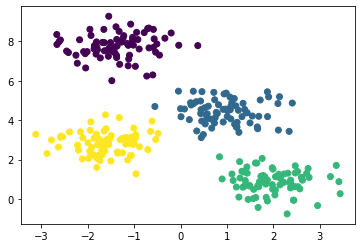

In [27]:
plt.scatter(x[:,0],x[:,1],c = pred_y)

### Dendrogram

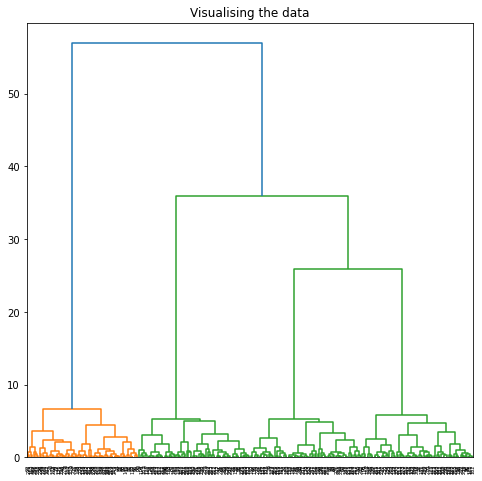

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x, method ='ward')))

In [32]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for i in range(2, 11):
    Agg = AgglomerativeClustering(n_clusters = i)
    Agg.fit(x)
    score = silhouette_score(x, Agg.labels_)
    silhouette_coefficients.append(score)

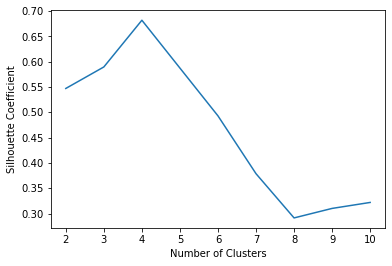

In [33]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()